In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('../../dataset/cleaned_arguments_in_context_learning.csv')
print(df.shape)
# Drop rows with empty lists
df.loc[300:]

(3380, 4)


,paragraph,text,actor,label
300,6. Det er også viktig å se Norge i en global s...,"[""Norway's per capita emissions are 7.5 tons o...",Bergen INP,Politisk parti
301,6. Det er også viktig å se Norge i en global s...,"[""Norway's per capita emissions are 7.5 tons o...",Person som ikke har oppgitt navn (140397),Privatperson
302,6. Det er også viktig å se Norge i en global s...,"[""Norway's per capita emissions are 7.5 tons o...",Person som ikke har oppgitt navn (143385),Privatperson
303,6. Det er også viktig å se Norge i en global s...,"[""Norway's per capita emissions are 7.5 tons o...",Person som ikke har oppgitt navn (183356),Privatperson
304,6. Det er også viktig å se Norge i en global s...,"[""Norway's per capita emissions are 7.5 tons o...",Stig Eidesmo,Privatperson
...,...,...,...,...
3375,Zero støtter utvalgets syn på viktigheten av å...,Å hente på bedre og mer samordnet areal- og tr...,ZERO,Frivillig organisasjon
3376,Det finnes også andre måter å minimere eller e...,Digitale løsninger Samordning av logistikk og ...,ZERO,Frivillig organisasjon
3377,Samtidig er det viktig å både holde fast på kl...,klimamålene kan bare innfris gjennom et aksele...,ZERO,Frivillig organisasjon
3378,Alle prosjekter som skal inn i NTP må kunne re...,Alle prosjekter som skal inn i NTP må kunne re...,ZERO,Frivillig organisasjon


In [54]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [55]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
[5 6 5 ... 4 3 5]


In [56]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))


0.3117428486397535


<Axes: >

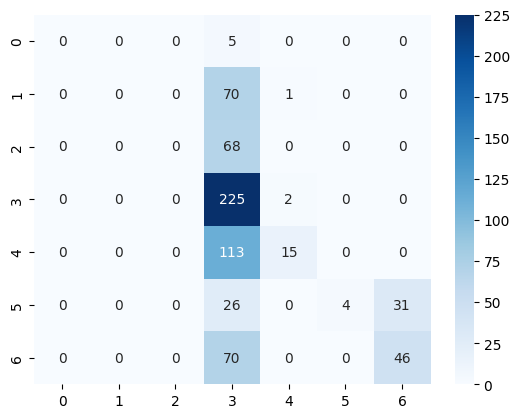

In [57]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.unique(y)]
    

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
labels = [id2label[i] for i in np.unique(y)]
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

## MNB with count vectorizer

In [ ]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

In [58]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
{'Akademisk institusjon': 0, 'Bedrift': 1, 'Frivillig organisasjon': 2, 'Interessegruppe': 3, 'Offentlig forvaltning': 4, 'Politisk parti': 5, 'Privatperson': 6}


In [59]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.9138357375442037


<Axes: >

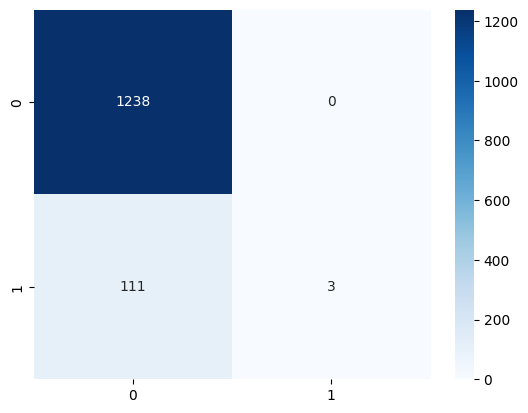

In [60]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [61]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["arguments"])
y = df["actor_label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

KeyError: 'arguments'

In [ ]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8750962851440776


<Axes: >

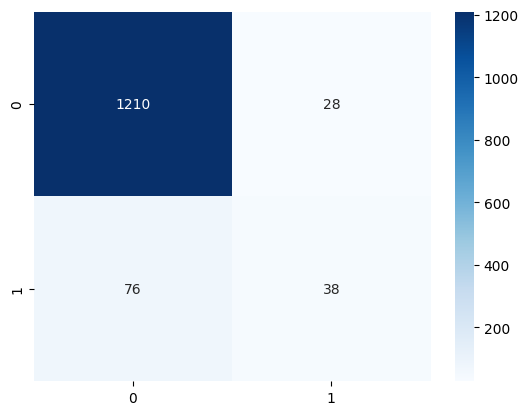

In [ ]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

## SVM